# IPL Cricket Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import cufflinks as cf

In [5]:
from plotly.offline import iplot

In [6]:
py.offline.init_notebook_mode(connected=True)

In [7]:
cf.go_offline()

In [12]:
matches = pd.read_csv("matches.csv", parse_dates=['date'], index_col=0)

In [14]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [15]:
matches.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [17]:
matches.isnull().mean()*100

season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

In [18]:
matches.shape

(756, 17)

In [21]:
matches.season.value_counts().sort_index()

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: season, dtype: int64

## Win and Lost Team Analysis

In [24]:
matches.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [26]:
matches.result.value_counts(normalize=True)*100

normal       98.280423
tie           1.190476
no result     0.529101
Name: result, dtype: float64

In [29]:
win_loss = matches[['team1','team2','winner']]

In [44]:
win_loss['losser'] = win_loss.apply(lambda x: (x['team2'] if x['team1']==x['winner'] else x['team1']), axis=1)

In [45]:
win_loss

,team1,team2,winner,losser
id,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils
...,...,...,...,...
11347,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Kolkata Knight Riders
11412,Chennai Super Kings,Mumbai Indians,Mumbai Indians,Chennai Super Kings
11413,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,Sunrisers Hyderabad


In [46]:
wins = win_loss['winner'].value_counts()
wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [47]:
loss = win_loss['losser'].value_counts()
loss

Royal Challengers Bangalore    95
Delhi Daredevils               94
Kings XI Punjab                94
Kolkata Knight Riders          86
Mumbai Indians                 78
Rajasthan Royals               70
Chennai Super Kings            64
Sunrisers Hyderabad            50
Deccan Chargers                46
Pune Warriors                  33
Gujarat Lions                  17
Rising Pune Supergiants         9
Kochi Tuskers Kerala            8
Rising Pune Supergiant          6
Delhi Capitals                  6
Name: losser, dtype: int64

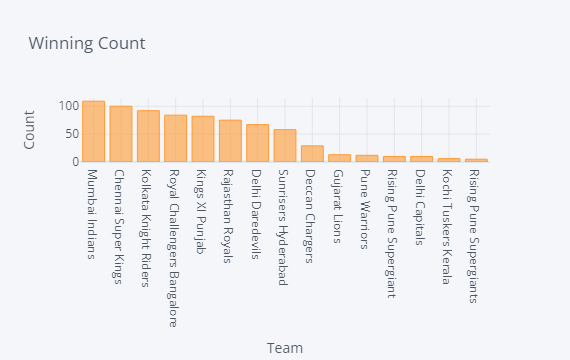

In [50]:
wins.iplot(kind='bar', xTitle='Team', yTitle='Count', 
          title='Winning Count')

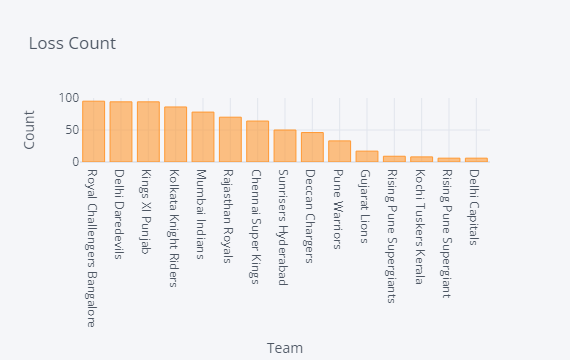

In [51]:
loss.iplot(kind='bar', xTitle='Team', yTitle='Count', 
          title='Loss Count')

## Player of Match and Citywise Analysis

In [53]:
matches.head(1)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [54]:
player_of_match = matches.player_of_match.value_counts()
player_of_match

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

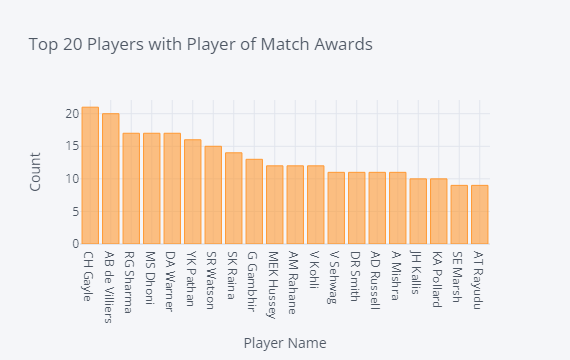

In [64]:
player_of_match.head(20).iplot(kind='bar',
                              xTitle='Player Name', yTitle='Count',
                              title='Top 20 Players with Player of Match Awards')

## Matches Hosted in Each City

In [70]:
cities = matches.city.value_counts()

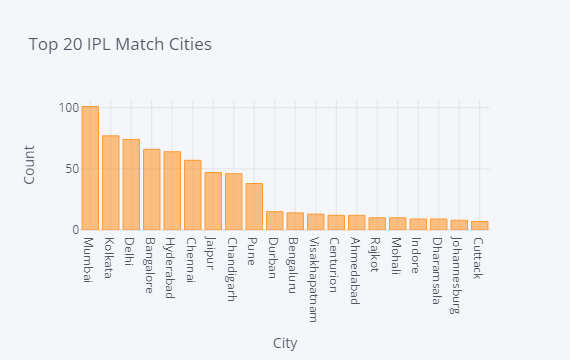

In [82]:
cities.head(20).iplot(kind='bar', xTitle='City', yTitle='Count',
            title='Top 20 IPL Match Cities')

## Matches Hosted at Venue

In [87]:
stadium = matches.venue.value_counts()

In [90]:
stadium.head(10)

Eden Gardens                                  77
M Chinnaswamy Stadium                         73
Wankhede Stadium                              73
Feroz Shah Kotla                              67
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Subrata Roy Sahara Stadium                    17
Name: venue, dtype: int64

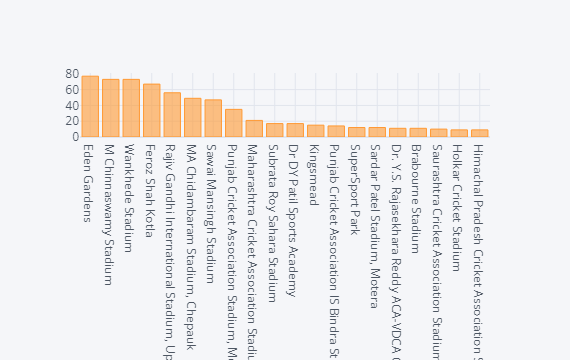

In [93]:
stadium.head(20).iplot(kind='bar')


## MI vs CSK - Head to Head

In [99]:
def get_mi_csk(team1, team2):
    teams = ['Chennai Super Kings', 'Mumbai Indians']
    if team1 in teams and team2 in teams:
        return True
    return False

In [112]:
index = []
for row in matches.iterrows():
    flag = get_mi_csk(row[1]['team1'], row[1]['team2'])
    index.append(flag)

In [115]:
sum(index)

28

In [118]:
micsk = matches[index]
micsk.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN


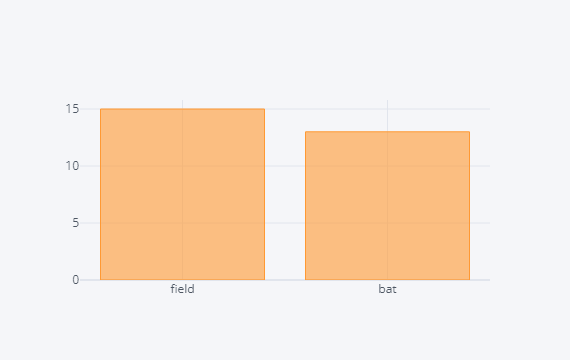

In [120]:
micsk['toss_decision'].value_counts().iplot(kind='bar')

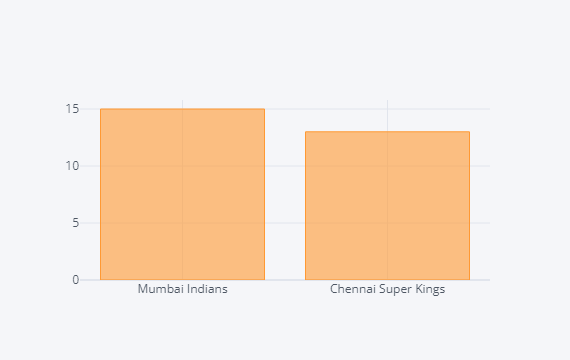

In [122]:
micsk['toss_winner'].value_counts().iplot(kind='bar')

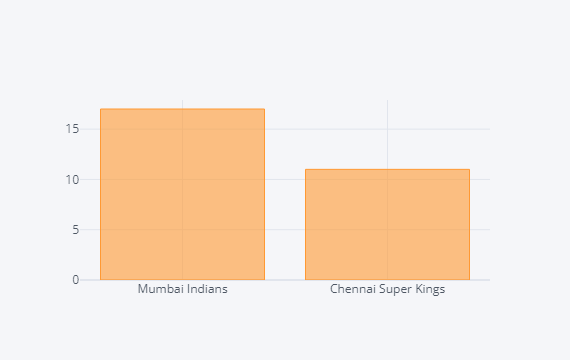

In [123]:
micsk['winner'].value_counts().iplot(kind='bar')

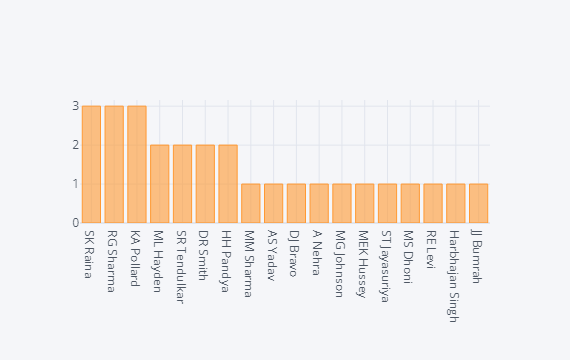

In [124]:
micsk['player_of_match'].value_counts().iplot(kind='bar')

In [129]:
temp = micsk[['winner','win_by_runs', 'win_by_wickets']]
temp = temp.set_index('winner')
temp.max()

win_by_runs       60
win_by_wickets     9
dtype: int64

<AxesSubplot: xlabel='winner'>

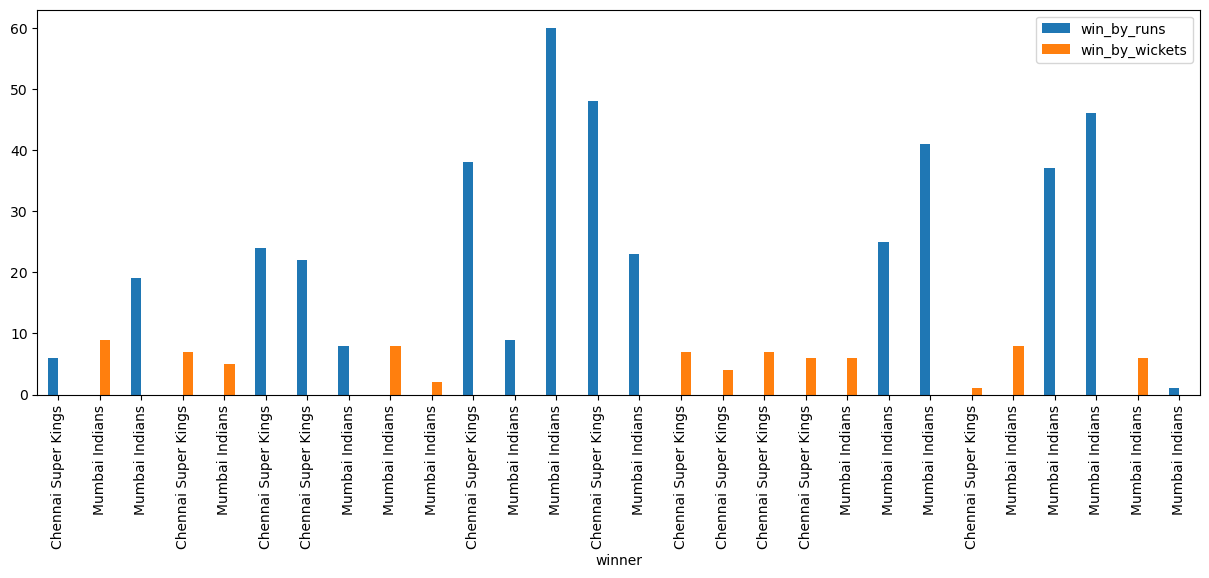

In [131]:
temp.plot.bar(figsize=(15,5))

## Season wise Match Summary

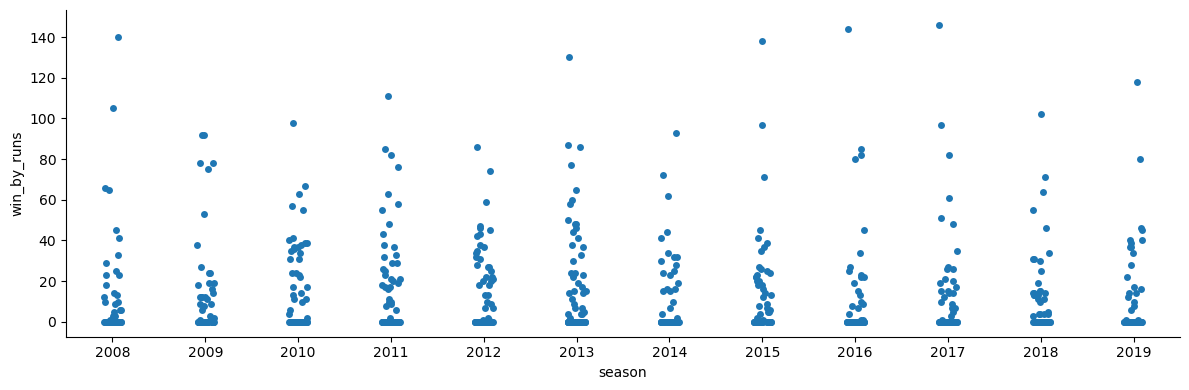

In [140]:
sns.catplot(x='season',y='win_by_runs', 
            data=matches,height=4, aspect=3)

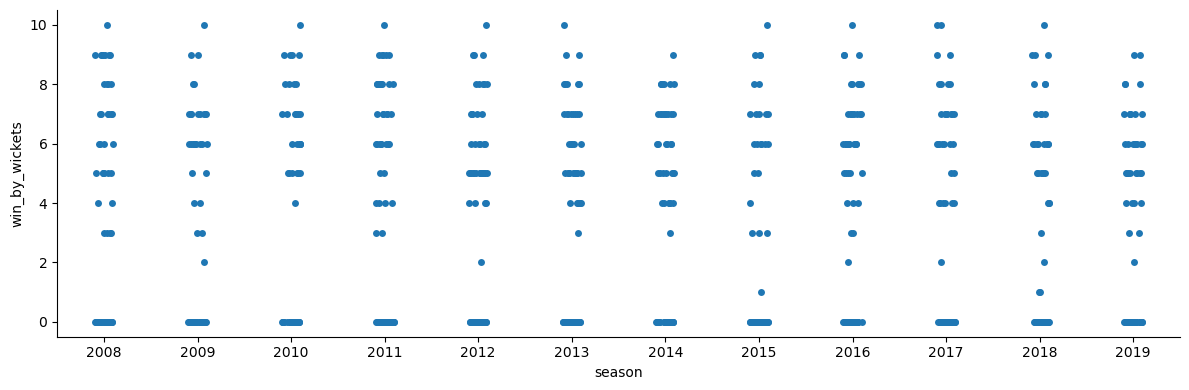

In [141]:
sns.catplot(x='season',y='win_by_wickets', 
            data=matches,height=4, aspect=3)

In [143]:
season = matches.groupby('season')['win_by_runs'].max()
season

season
2008    140
2009     92
2010     98
2011    111
2012     86
2013    130
2014     93
2015    138
2016    144
2017    146
2018    102
2019    118
Name: win_by_runs, dtype: int64

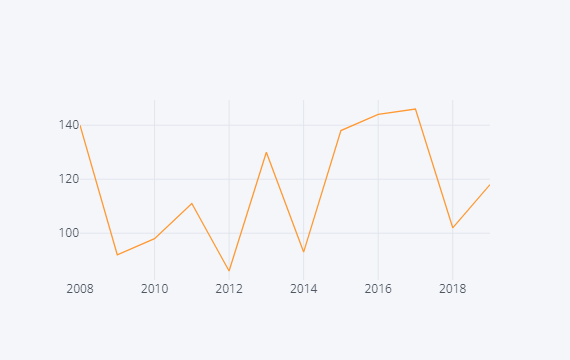

In [144]:
season.iplot()

## Ball by Ball Analysis

In [146]:
df = pd.read_csv('deliveries.csv',index_col='match_id')

In [147]:
df.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


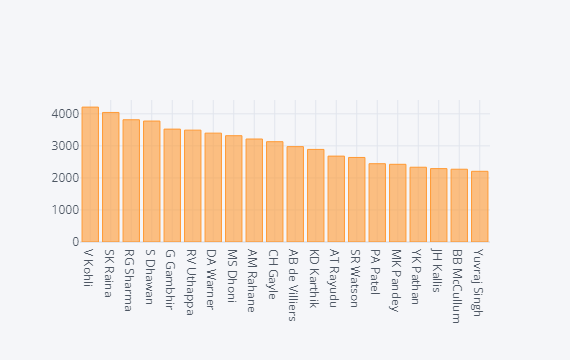

In [153]:
df['batsman'].value_counts()[:20].iplot(kind='bar')

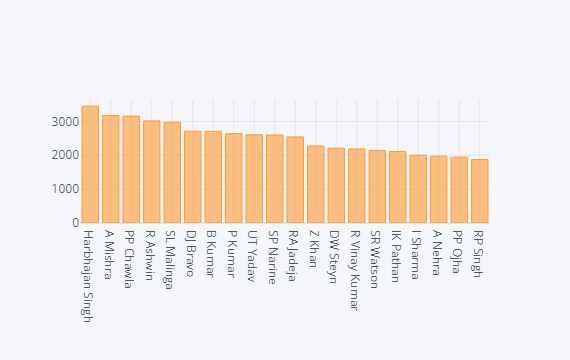

In [154]:
df['bowler'].value_counts()[:20].iplot(kind='bar')

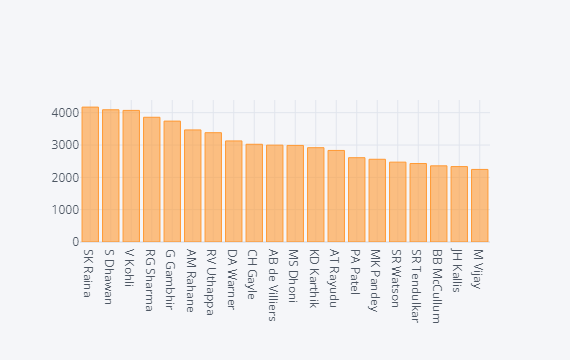

In [155]:
df['non_striker'].value_counts()[:20].iplot(kind='bar')

In [163]:
runs = df.groupby('batting_team')[['batsman_runs', 'total_runs']].sum()

In [164]:
runs

,batsman_runs,total_runs
batting_team,,
Chennai Super Kings,25104,26418
Deccan Chargers,10885,11463
Delhi Capitals,2530,2630
Delhi Daredevils,23115,24388
Gujarat Lions,4629,4862
Kings XI Punjab,26468,27893
Kochi Tuskers Kerala,1758,1901
Kolkata Knight Riders,25895,27419
Mumbai Indians,28164,29809


In [166]:
runs['extra_runs'] = runs['total_runs'] - runs['batsman_runs']
runs

,batsman_runs,total_runs,extra_runs
batting_team,,,
Chennai Super Kings,25104,26418,1314
Deccan Chargers,10885,11463,578
Delhi Capitals,2530,2630,100
Delhi Daredevils,23115,24388,1273
Gujarat Lions,4629,4862,233
Kings XI Punjab,26468,27893,1425
Kochi Tuskers Kerala,1758,1901,143
Kolkata Knight Riders,25895,27419,1524
Mumbai Indians,28164,29809,1645


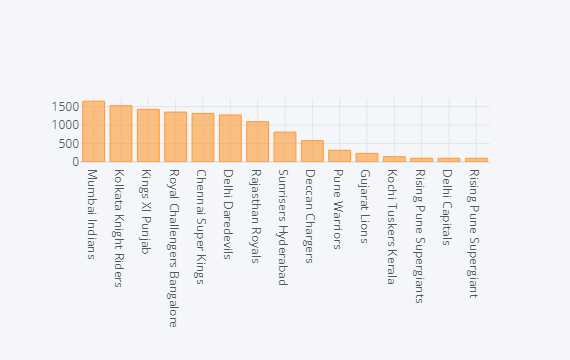

In [171]:
runs['extra_runs'].sort_values(ascending=False).iplot(kind='bar')

In [175]:
batsman = df.groupby('batsman')['batsman_runs'].sum()
batsman

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Dananjaya          4
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2765
Z Khan             117
Name: batsman_runs, Length: 516, dtype: int64

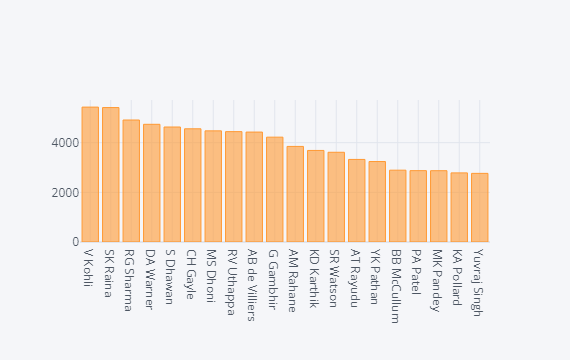

In [179]:
batsman.sort_values(ascending=False).head(20).iplot(kind='bar')

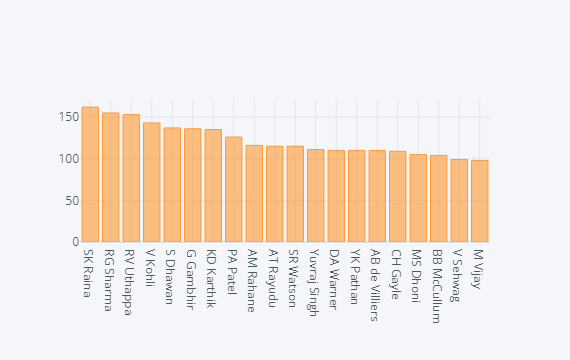

In [182]:
df['player_dismissed'].value_counts().head(20).iplot(kind='bar')

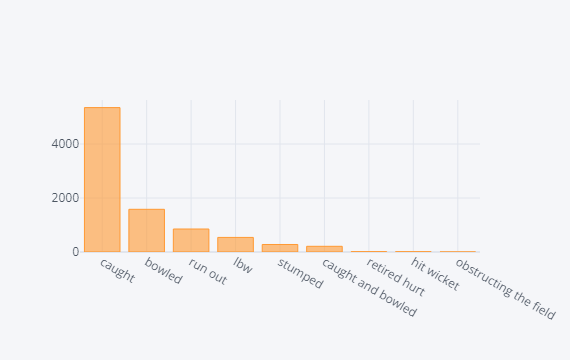

In [183]:
df['dismissal_kind'].value_counts().head(20).iplot(kind='bar')